## Assignment 3
## Support Vector Machine
### Name: Gautam Kumar
### Roll Number: 21CS30020

In [24]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

spambase = fetch_ucirepo(id=94)
# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets
# metadata
print(spambase.metadata)
# variable information
print(spambase.variables)
# loading as dataframe
x = spambase.data.features
y = spambase.data.targets

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [27]:
print(len(X))

4601


In [28]:
y = y.iloc[:, 0].ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

In [29]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [30]:
y_pred = svm_model.predict(X_test)

In [31]:
##Acuracy without applying Regularisation
accuracy = accuracy_score(y_test, y_pred)

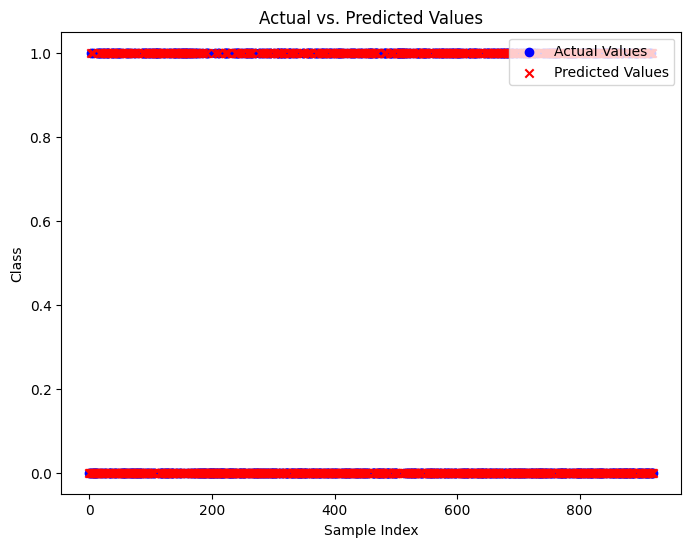

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', marker='o')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend(loc='upper right')
plt.show()

In [33]:
C_values = [0.001, 0.1, 1, 10, 100]
accuracy_scores = []
y_preds = []

In [34]:
for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    y_preds.append(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [35]:
accuracy_table = pd.DataFrame({'C': C_values, 'Accuracy': accuracy_scores})

In [36]:
accuracy_table

,C,Accuracy
0,0.001,0.865364
1,0.100,0.925081
2,1.000,0.922910
3,10.000,0.918567
4,100.000,0.913138


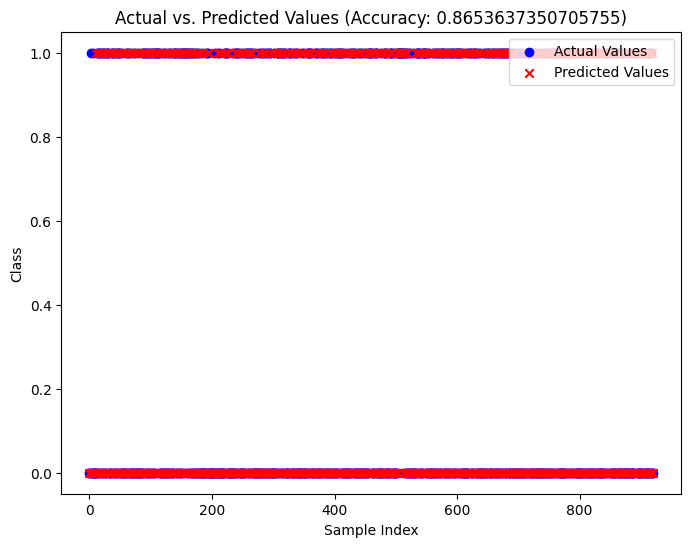

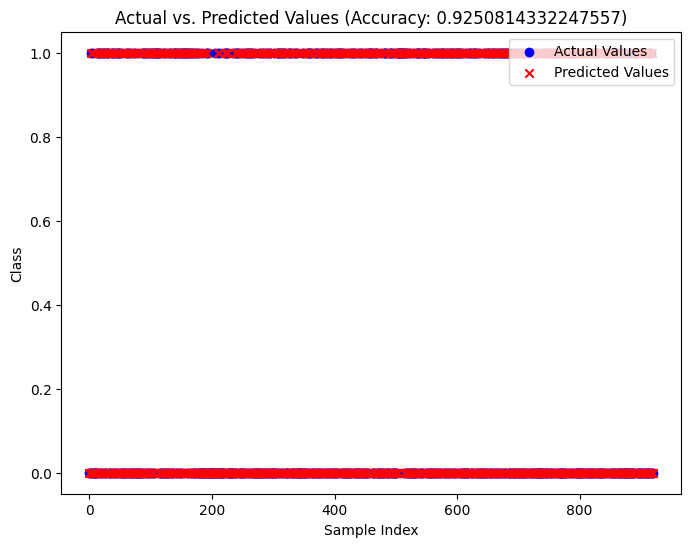

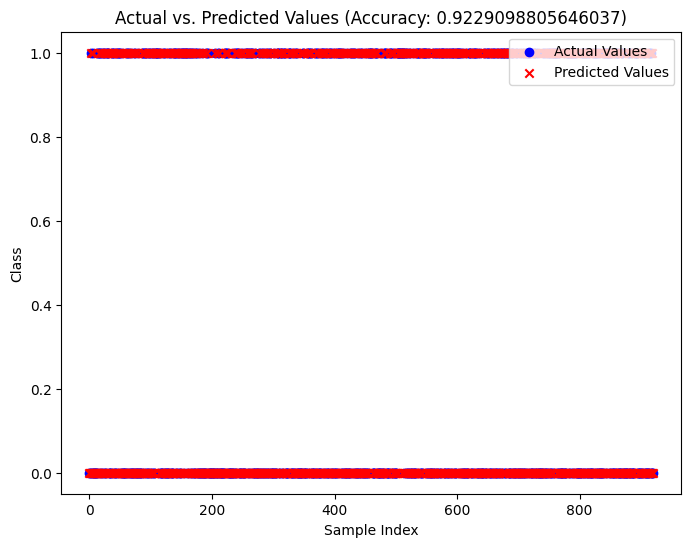

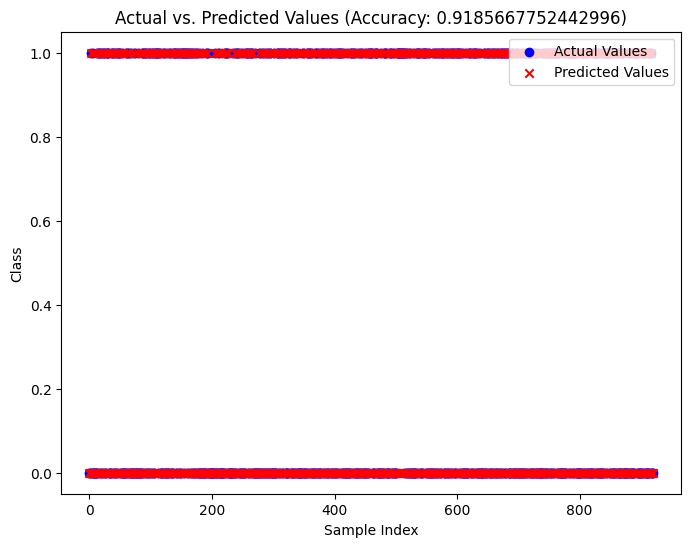

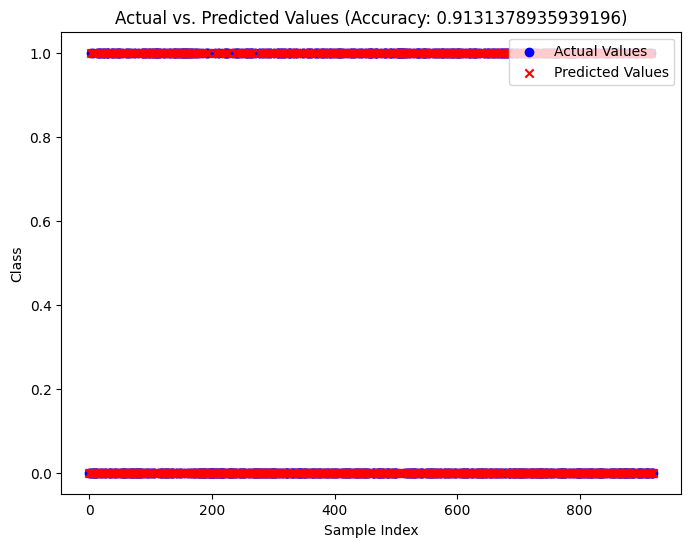

In [37]:
i = 0
for y_pred in y_preds:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', marker='o')
    plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values', marker='x')
    plt.title(f'Actual vs. Predicted Values (Accuracy: {accuracy_scores[i]})')
    plt.xlabel('Sample Index')
    plt.ylabel('Class')
    plt.legend(loc='upper right')
    plt.show()
    i += 1 

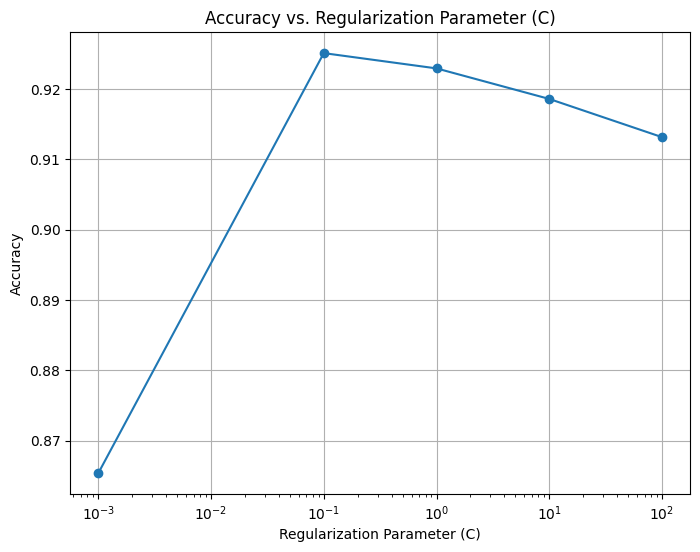

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(C_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.xlabel('Regularization Parameter (C)')
plt.xscale('log') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [39]:
# Define a list of kernels to test
kernels = ['poly', 'poly', 'sigmoid', 'rbf']
degrees = [2, 3, 0, 0]  # Specify the degrees for the polynomial kernels

In [40]:
results = []
for kernel, degree in zip(kernels, degrees):
    if kernel == 'poly':
        # Polynomial kernel
        svm_model = SVC(kernel=kernel, degree=degree)
    else:
        # Sigmoid or RBF kernel
        svm_model = SVC(kernel=kernel)

    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'Kernel': kernel,
        'Degree': degree if kernel == 'poly' else None,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
results_df = pd.DataFrame(results)


In [41]:
results_df

,Kernel,Degree,Accuracy,Precision,Recall,F1 Score
0,poly,2.0,0.649294,0.731458,0.649294,0.577828
1,poly,3.0,0.625407,0.718539,0.625407,0.533076
2,sigmoid,NaN,0.635179,0.632524,0.635179,0.633420
3,rbf,NaN,0.662324,0.662088,0.662324,0.644053


In [42]:
degrees = [1, 1, 3, 3]
C_values = [0.01, 100, 0.01, 100]
train_accuracies = []
test_accuracies = []


In [43]:
for degree, C in zip(degrees, C_values):
    svm_model = SVC(kernel='poly', degree=degree, C=C)
    svm_model.fit(X_train, y_train)
    
    # Training accuracy
    y_train_pred = svm_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Test accuracy
    y_test_pred = svm_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)


In [44]:
experiment_results = pd.DataFrame({
    'Polynomial Degree': degrees,
    'Regularization Parameter (C)': C_values,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

In [45]:
experiment_results

,Polynomial Degree,Regularization Parameter (C),Train Accuracy,Test Accuracy
0,1,0.01,0.663587,0.621064
1,1,100.00,0.784511,0.760043
2,3,0.01,0.651359,0.611292
3,3,100.00,0.699728,0.660152


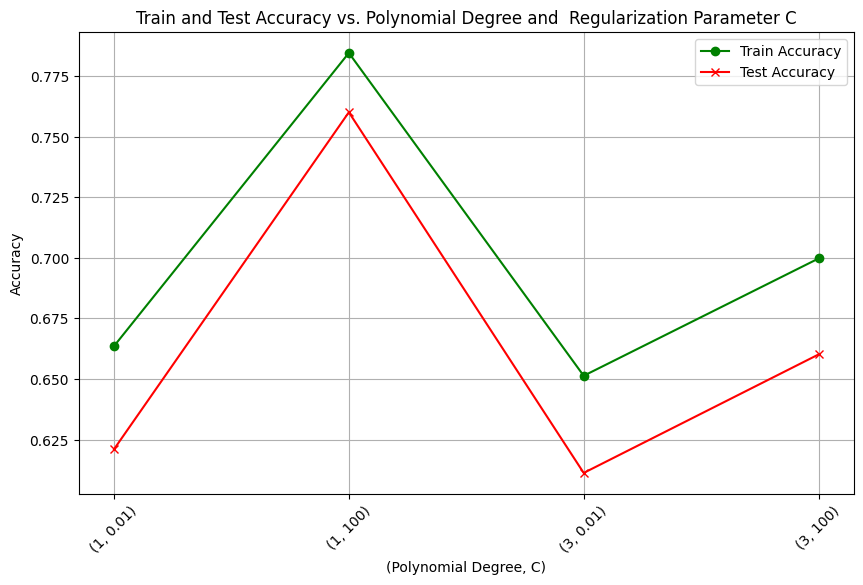

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(experiment_results)), train_accuracies,color='green', marker='o', label='Train Accuracy')
plt.plot(range(len(experiment_results)), test_accuracies,color='red', marker='x', label='Test Accuracy')
plt.xticks(range(len(experiment_results)), [f'({degree}, {C})' for degree, C in zip(degrees, C_values)], rotation=45)
plt.xlabel('(Polynomial Degree, C)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Polynomial Degree and  Regularization Parameter C')
plt.legend()
plt.grid(True)
plt.show()